## EDA on daily price data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
file_paths = {
    "Bitcoin": "../../data/processed/daily/coin_Bitcoin_processed.csv",
    "Ethereum": "../../data/processed/daily/coin_Ethereum_processed.csv",
    "XRP": "../../data/processed/daily/coin_XRP_processed.csv",
    "Dogecoin": "../../data/processed/daily/coin_Dogecoin_processed.csv"
}
data = {name: pd.read_csv(path) for name, path in file_paths.items()}

bitcoin_data = data['Bitcoin']
#print(bitcoin_data.info())
#print(bitcoin_data.describe())
#print(bitcoin_data.isnull().sum()) # no missing values

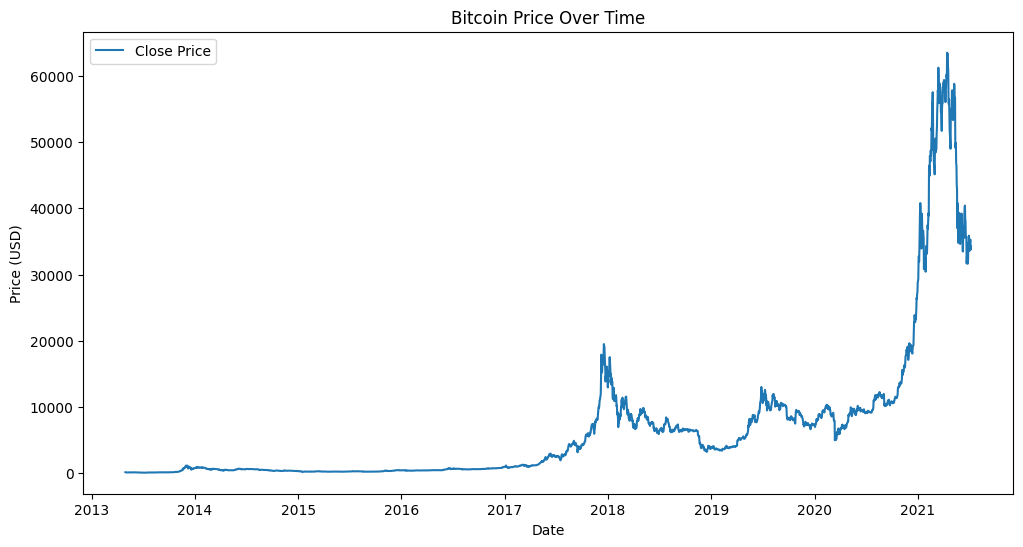

In [11]:
import matplotlib.pyplot as plt

# Convert date column to datetime
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])

# Plot price trends over time
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'], label='Close Price')
plt.title("Bitcoin Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

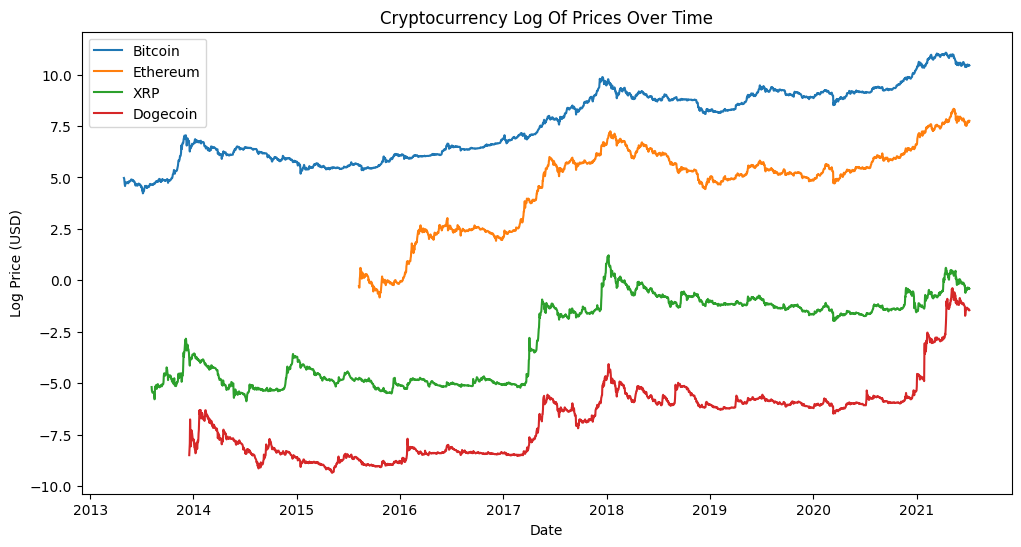

In [25]:
plt.figure(figsize=(12, 6))
for name, df in data.items():
    #log close prices
    df['lg_Close'] = np.log(df['Close'])
    df['Date'] = pd.to_datetime(df['Date'])
    plt.plot(df['Date'], df['lg_Close'], label=name)

plt.title("Cryptocurrency Log Of Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Log Price (USD)")
plt.legend()
plt.show()

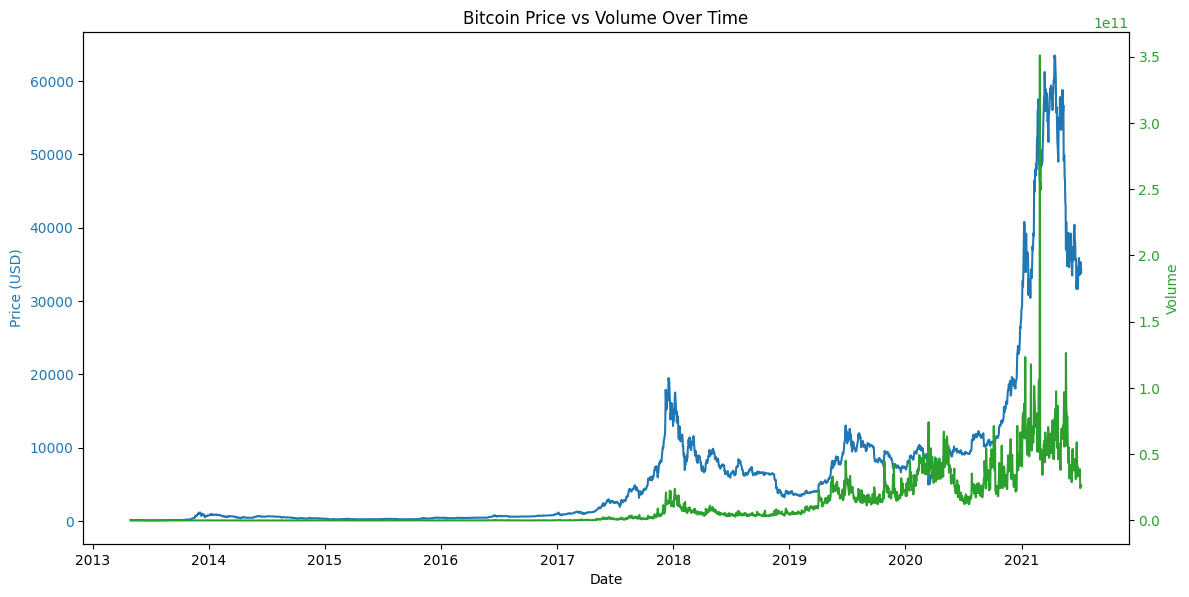

In [13]:
# Plot volume and price together
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)', color=color)
ax1.plot(bitcoin_data['Date'], bitcoin_data['Close'], label='Close Price', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Volume', color=color)
ax2.plot(bitcoin_data['Date'], bitcoin_data['Volume'], label='Volume', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Bitcoin Price vs Volume Over Time")
plt.show()

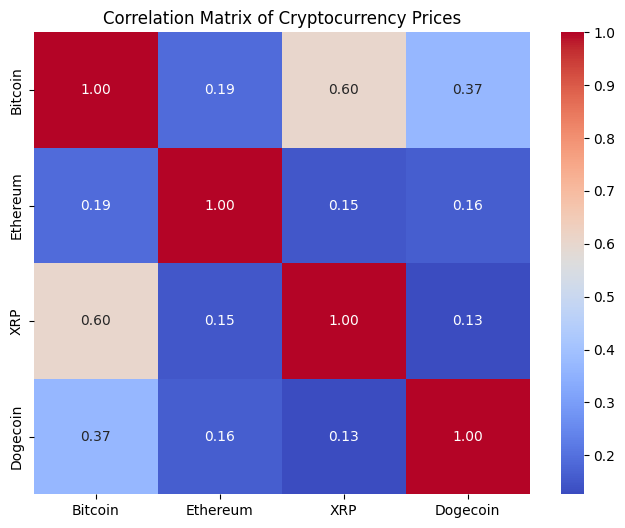

In [27]:
# Merge price data for correlation analysis
combined_prices = pd.DataFrame({'Date': data['Bitcoin']['Date']})
for name, df in data.items():
    combined_prices[name] = df['Close']

combined_prices['Date'] = pd.to_datetime(combined_prices['Date'])
combined_prices.set_index('Date', inplace=True)

# Compute correlation matrix
price_corr = combined_prices.corr()

# Plot correlation heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(price_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Cryptocurrency Prices")
plt.show()
